In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
os.getcwd()


Bad key "text.kerning_factor" on line 4 in
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


'/home/vizziwo/capcookie/models'

## Loading Data

In [2]:
X_train = pd.read_csv('../data/processed/X1_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X1_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y1_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y1_test.csv', index_col=0)

In [3]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2836,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.740107
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.504791
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.269475
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.583230
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907106


## Dummy Classifier

##### Since my data is imbalanced, I want to make sure my models perform at least as well as a model that always guessing the largest class.

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='uniform', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(constant=None, random_state=42, strategy='uniform')

F1: 0.326923076923077
ROC-AUC: 0.5
Accuracy: 0.4857142857142857


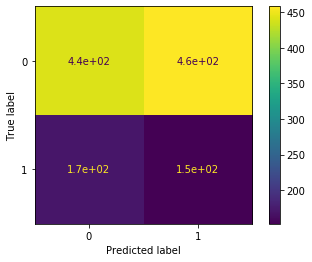

In [5]:
y_predict_dummy = dummy.predict(X_test)
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]

f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])
cv_scores_train= cross_val_score(dummy,X_train,y_train,cv=5,scoring='f1')
cv_scores_dum_train= cv_scores_train.mean()
print('F1:', f1_dum)
print('ROC-AUC:', auc_dum)
print('Accuracy:', dummy.score(X_test, y_test))


Since I'm interested mostly in how many 'True' were predicted 'True,' the F1 Score seems especially useful for me. I may also want to look at 'Recall' to judge a model by its false negatives.
The dummy model has a relatively high ROC-AUC score for a dummy model, so I won't use this to judge.

# SVM, out of the box

Mean CV F1 training score: 0.29114314897750926
Accuracy: 0.7444897959183674
F1 Score: 0.2934537246049661


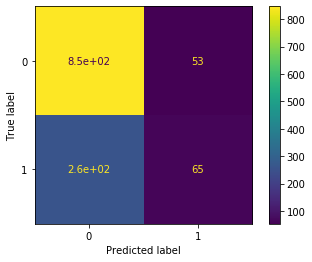

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
cv_scores_svm_train= cv_scores_train.mean()
print ('Mean CV F1 training score: ' +str(cv_scores_svm_train))
print('Accuracy:', Accuracy_svm)
print('F1 Score:', f1_svm)
plot_confusion_matrix(svm, X_test, y_test)

## RANDOM FOREST, out of the box

Mean CV training F1 score: 0.34632903225356054
Accuracy: 0.7436734693877551
F1 Score: 0.3114035087719298


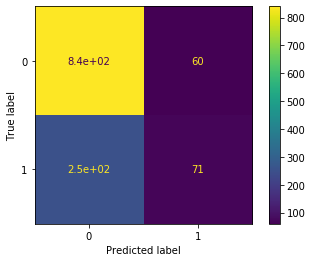

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]
Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
cv_scores_rf_train= cv_scores_train.mean()
print ('Mean CV training F1 score: ' +str(cv_scores_rf_train))

print('Accuracy:', Accuracy_rf)
print('F1 Score:', f1_score(y_test, y_predict_rf))


## GRADIENT BOOST, out of the box

Mean CV F1 Training Score: 0.43905498487198696
Accuracy: 0.7510204081632653
F1 Score: 0.41005802707930367


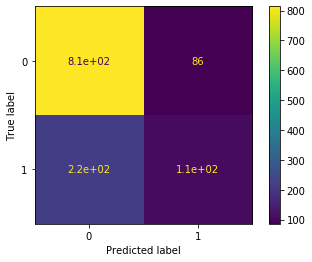

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
plot_confusion_matrix(gbc, X_test, y_test)
predprob = gbc.predict_proba(X_test)[:,1]
Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)

cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
cv_scores_gbc_train= cv_scores_train.mean()
print ('Mean CV F1 Training Score: ' +str(cv_scores_gbc_train))

print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))

## LOGISTIC REGRESSION

Mean CV F1 Training Score: 0.4262236611119052
Accuracy: 0.7485714285714286
F1 Score: 0.3765182186234818


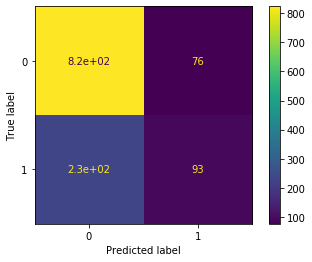

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(lr, X_test, y_test)

predprob = lr.predict_proba(X_test)[:,1]
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
cv_scores_lr_train= cv_scores_train.mean()

print ('Mean CV F1 Training Score: ' +str(cv_scores_lr_train))


print('Accuracy:', Accuracy_lr)
print('F1 Score:', f1_score(y_test, y_predict_lr))


In [10]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
f1_scores = [f1_dum, f1_svm, f1_rf, f1_gbc, f1_lr]
df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, f1_scores)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'F1 Scores'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,F1 Scores
0,dummy,0.500000,0.470769,0.350026,0.326923
1,svm,0.716945,0.200000,0.291143,0.293454
2,rf,0.693299,0.218462,0.346329,0.311404
3,gbc,0.707246,0.326154,0.439055,0.410058
4,lr,0.723885,0.286154,0.426224,0.376518


None of the models perform much better than the dummy model.